In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")    #there were some blank values that's why its type was showing object
df["TotalCharges"] = df["TotalCharges"].astype("float")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df.isnull().sum().sum()       #double sum() shows overall null values in dataset

0

In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [14]:
df.duplicated().sum()

0

In [16]:
df["customerID"].duplicated().sum()        #we should check for duplicates of the basis of unique ID also

0

In [17]:
#created a function to convert 0,1 to YES and NO to simply understand it

def conv(value):
    if value == 1:
        return "YES"
    else:
        return "NO"

df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

In [18]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,NO,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,NO,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,NO,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,NO,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,NO,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


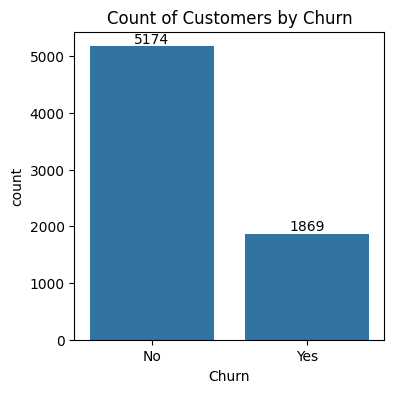

In [49]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x = "Churn", data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

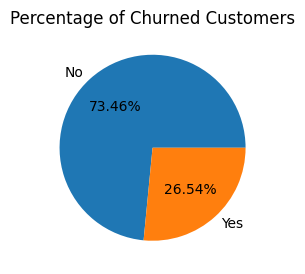

In [48]:
plt.figure(figsize=(3,4))
gb = df.groupby("Churn").agg({"Churn":"count"})
plt.pie(gb["Churn"], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churned Customers")
plt.show()

# from pie chart we can see 26.54% have been churned 
# Now explore the reason behind it

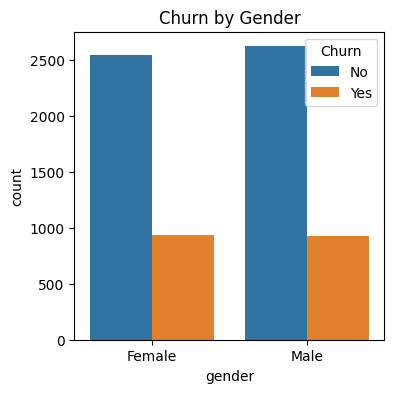

In [54]:
plt.figure(figsize=(4,4))
sns.countplot(x="gender", data=df, hue = "Churn")
plt.title("Churn by Gender")
plt.show()

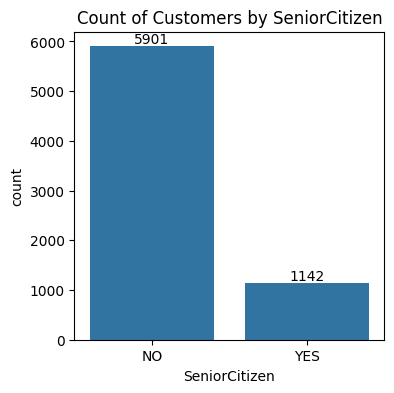

In [58]:
plt.figure(figsize=(4,4))
ax = sns.countplot( x="SeniorCitizen", data=df )
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by SeniorCitizen")
plt.show()

<Figure size 400x400 with 0 Axes>

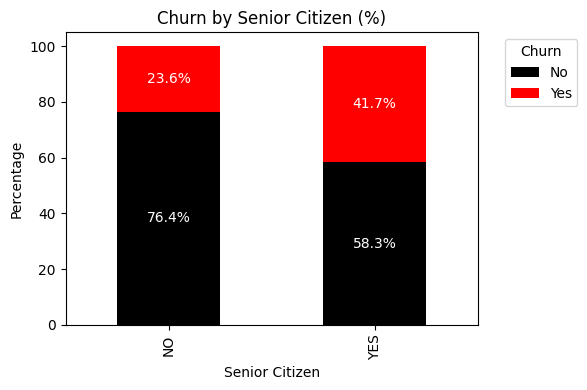

In [72]:
plt.figure(figsize=(4,4))
# Step 1: Calculate the counts
counts = pd.crosstab(df["SeniorCitizen"], df["Churn"])

# Step 2: Normalize counts to get percentages
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Step 3: Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(6, 4))
bars = percentages.plot(kind="bar", stacked=True, figsize=(6, 4), color=["black", "red"], ax=ax)

# Step 4: Add percentage labels
for bar_container in bars.containers:
    for bar in bar_container:
        # Get the bar height (percentage value)
        height = bar.get_height()
        if height > 0:  # To avoid labeling 0%
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # X-coordinate
                bar.get_y() + height / 2,           # Y-coordinate
                f"{height:.1f}%",                  # Label text
                ha="center", va="center", fontsize=10, color="white"
            )

# Add labels and title
plt.title("Churn by Senior Citizen (%)")
plt.xlabel("Senior Citizen")
plt.ylabel("Percentage")
plt.legend(title="Churn", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()


plt.show()

# comparative a greater % of people in senior citizen category has churned

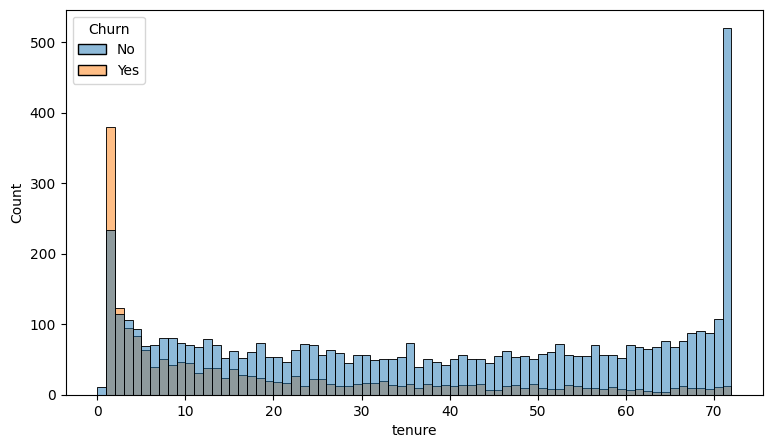

In [77]:
plt.figure(figsize=(9,5))

sns.histplot(x= "tenure", data = df, bins = 72, hue = "Churn")
plt.show()

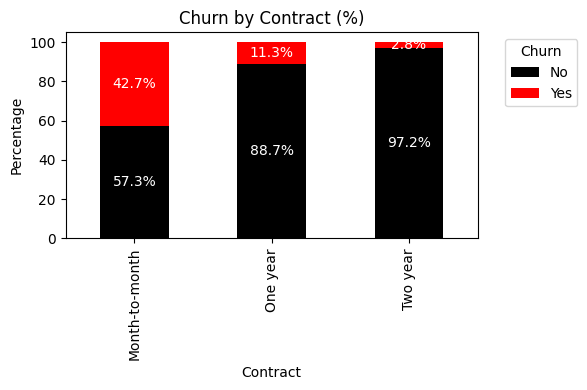

In [81]:

# Step 1: Calculate the counts
counts = pd.crosstab(df["Contract"], df["Churn"])

# Step 2: Normalize counts to get percentages
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Step 3: Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(6, 4))
bars = percentages.plot(kind="bar", stacked=True, figsize=(6, 4), color=["black", "red"], ax=ax)

# Step 4: Add percentage labels
for bar_container in bars.containers:
    for bar in bar_container:
        # Get the bar height (percentage value)
        height = bar.get_height()
        if height > 0:  # To avoid labeling 0%
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # X-coordinate
                bar.get_y() + height / 2,           # Y-coordinate
                f"{height:.1f}%",                  # Label text
                ha="center", va="center", fontsize=10, color="white"
            )

# Add labels and title
plt.title("Churn by Contract (%)")
plt.xlabel("Contract")
plt.ylabel("Percentage")
plt.legend(title="Churn", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()


plt.show()

# people who  have month to month contract are more likely to churn then from those who have 1 or 2 year contract

In [84]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

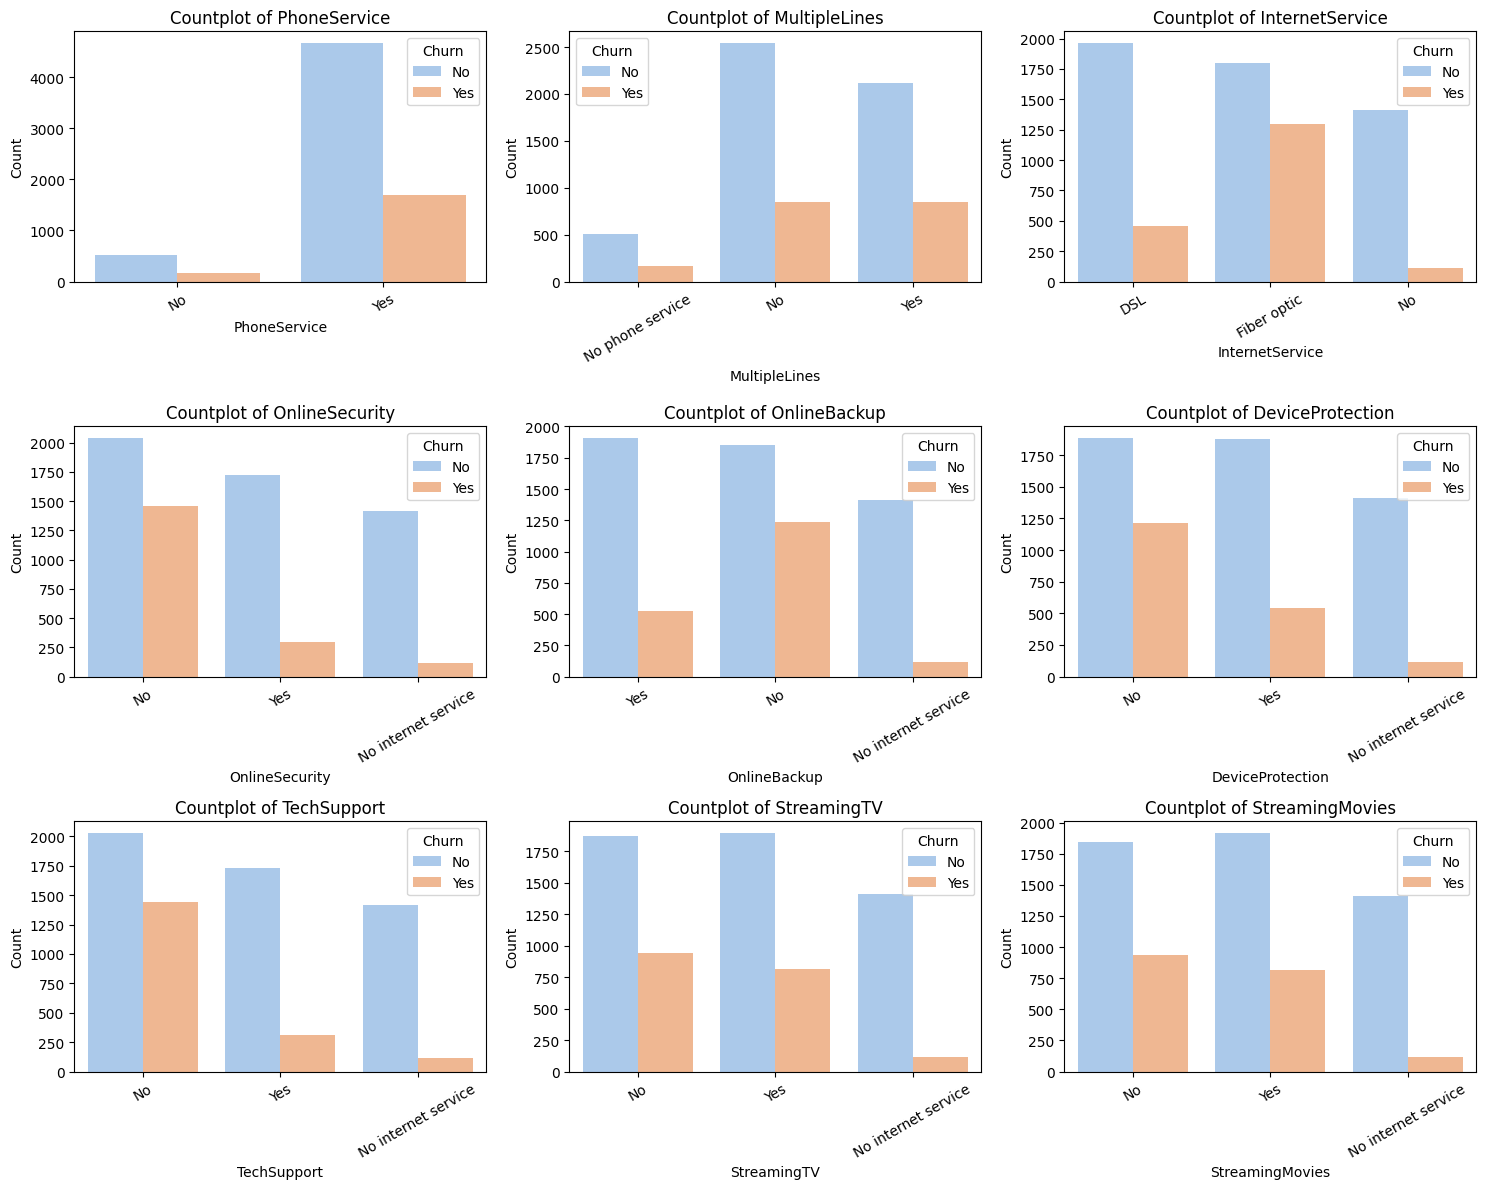

In [86]:
# List of columns to plot
columns = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Create subplots
num_columns = len(columns)
rows = (num_columns + 2) // 3  # Arrange in a grid with 3 columns
fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 4))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop through each column and create countplots
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], palette="pastel", hue = "Churn")
    axes[i].set_title(f"Countplot of {col}", fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel("Count", fontsize=10)
    axes[i].tick_params(axis="x", rotation=30)  # Rotate x-ticks if necessary

# Remove unused subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

# From the charts:

1. Customers who don’t use certain services like Internet or PhoneService tend to leave (churn) less often compared to those using services like Fiber optic or having extra features.
2. Services like OnlineSecurity, TechSupport, and DeviceProtection show higher churn rates for customers who don’t have them.
3. For services like MultipleLines, StreamingTV, and StreamingMovies, the churn is more evenly spread, but some differences can still be seen.

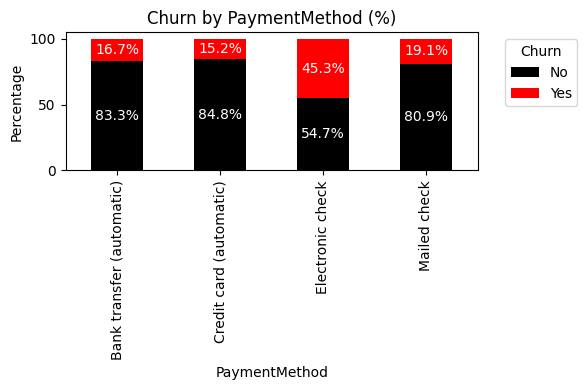

In [88]:
# Step 1: Calculate the counts
counts = pd.crosstab(df["PaymentMethod"], df["Churn"])

# Step 2: Normalize counts to get percentages
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Step 3: Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(6, 4))
bars = percentages.plot(kind="bar", stacked=True, figsize=(6, 4), color=["black", "red"], ax=ax)

# Step 4: Add percentage labels
for bar_container in bars.containers:
    for bar in bar_container:
        # Get the bar height (percentage value)
        height = bar.get_height()
        if height > 0:  # To avoid labeling 0%
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # X-coordinate
                bar.get_y() + height / 2,           # Y-coordinate
                f"{height:.1f}%",                  # Label text
                ha="center", va="center", fontsize=10, color="white"
            )

# Add labels and title
plt.title("Churn by PaymentMethod (%)")
plt.xlabel("PaymentMethod")
plt.ylabel("Percentage")
plt.legend(title="Churn", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()


plt.show()

# Customer is likely to churn if he usese Electronic check payment method